<a href="https://colab.research.google.com/github/tawfiqam/MI564/blob/main/Ex_Foster_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/FelixChop/MediumArticles/blob/master/Graph_analysis_Python.ipynb

Had some trouble installing Pyviz...for network viz

In [8]:
import pandas as pd
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20,'figure.figsize':(10,8)})

In [9]:
#mount the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#import pandas DataFrame
df = pd.read_json('/content/gdrive/MyDrive/Foster care/Ex_Foster Paper/Ex_Foster_Complete.json')

In [ ]:
df_p = pd.read_json('/content/gdrive/MyDrive/Foster care/Ex_Foster Paper/user_relations.json')

For some reason, the same operation is not working here...

In [ ]:
column_edge = 'parent_id'
column_ID = 'author'

data_to_merge = df[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates() # select columns, remove NaN

# To create connections between people who have the same number,
# join data with itself on the 'ID' column.
data_to_merge = data_to_merge.merge(
    data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}), 
    on=column_edge
)

In [ ]:
data_to_merge

,author,parent_id,author_2
0,L2F2020,t1_g6x1fn2,L2F2020
1,L2F2020,t1_g6x1fn2,iOnlyDo69
2,L2F2020,t1_g6x1fn2,RapidRadRunner
3,iOnlyDo69,t1_g6x1fn2,L2F2020
4,iOnlyDo69,t1_g6x1fn2,iOnlyDo69
...,...,...,...
19653,obs0lescence,t1_ejxhmim,LiwyikFinx
19654,LiwyikFinx,t1_ejxhmim,obs0lescence
19655,LiwyikFinx,t1_ejxhmim,LiwyikFinx
19656,LiwyikFinx,t1_ejyoo3y,LiwyikFinx


In [ ]:
# By joining the data with itself, people will have a connection with themselves.
# Remove self connections, to keep only connected people who are different.
d = data_to_merge[~(data_to_merge[column_ID]==data_to_merge[column_ID+"_2"])] \
    .dropna()[[column_ID, column_ID+"_2", column_edge]]
    
# To avoid counting twice the connections (person 1 connected to person 2 and person 2 connected to person 1)
# we force the first ID to be "lower" then ID_2
d.drop(d.loc[d[column_ID+"_2"]<d[column_ID]].index.tolist(), inplace=True)

In [ ]:
d

,author,author_2,parent_id
1,L2F2020,iOnlyDo69,t1_g6x1fn2
2,L2F2020,RapidRadRunner,t1_g6x1fn2
7,RapidRadRunner,iOnlyDo69,t1_g6x1fn2
11,SeaCow7829,obs0lescence,t1_g6wsmny
15,RapidRadRunner,Rrenphoenixx,t3_j11x3y
...,...,...,...
19636,LiwyikFinx,orphanmope,t3_b8cewe
19637,LiwyikFinx,juxtaposehere,t3_b8cewe
19638,LiwyikFinx,SweetTartAtHeart,t3_b8cewe
19643,obs0lescence,watyrfall,t3_b870pn


In [ ]:
import networkx as nx

G = nx.from_pandas_edgelist(df=d, source=column_ID, target=column_ID+'_2', edge_attr=column_edge)

G.add_nodes_from(nodes_for_adding=df.author.tolist())

In [ ]:
len(G.nodes())

741

In [ ]:
len(G.edges())

5514

In [ ]:
nx.write_gml(G, "/content/gdrive/MyDrive/Foster care/Ex_Foster Paper/Ex_Foster_Net.gml")

In [ ]:
nx.write_edgelist(G, 'Ex_Foster_edgelistFile.csv', delimiter=',')

In [ ]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 741
Number of edges: 5514
Average degree:  14.8826


In [ ]:
%cd /content/gdrive/MyDrive/Foster care/Ex_Foster Paper

/content/gdrive/MyDrive/Foster care/Ex_Foster Paper


In [ ]:
G.nodes

NodeView(('L2F2020', 'iOnlyDo69', 'RapidRadRunner', 'SeaCow7829', 'obs0lescence', 'Rrenphoenixx', 'TiPtoeThroughTulips', '[deleted]', 'giadance', 'r1g8tn0w', 'webmetalreese', 'blueevey', 'FuzzyOverlordsMom', 'spinnetrouble', 'dualAuxiliatrix', 'cherish_ireland', 'StoneyDazzler', 'Jaxlee2018', 'sdam87', 'overpickledpage', 'SeaDawgs', 'Miiaevia', 'blahblahohlala', 'Alluvial_Fan_', 'transientcat', 'massahwahl', 'nottodaykitten', 'AveryTheOctopus', 'CelStrider', 'AquaticAZN', 'LordTrollsworth', 'water_solo', 'PixelPenguinArtist', 'ToughlyPossible', 'tributarytears', 'kellysonata', 'vaincreux', 'Bajingosisters', 'LiwyikFinx', 'Monopolyalou', 'middlegray', 'Grapevegetable0', 'agaertner4', 'Fuckwayoff', 'jasmynxjoy', 'forgetaboutit211', 'nattie3789', 'stevienienie', 'serene_horror', 'GigabyteofKnowledge', 'Puzzled-Remote', 'AJB160816', 'heronstoes', 'illbefine72949204', 'papayaalert', 'Alone_Mushroom5312', 'leighaorie', 'ince1uprising', 'Tonybrazier699', 'puka_panty', 'PeensMagicalBeans', 'Ka

In [ ]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.020111609585293795


In [ ]:
fell_whitehead_path = nx.shortest_path(G, source="L2F2020", target="SeaCow7829")

print("Shortest path between users:", fell_whitehead_path)

print("Length of that path:", len(fell_whitehead_path)-1)

Shortest path between users: ['L2F2020', 'iOnlyDo69', 'sdam87', 'SeaCow7829']
Length of that path: 3


In [ ]:
nx.is_connected(G)

False

In [ ]:
components = nx.connected_components(G)
largest_component = max(components, key=len)
print(len(largest_component))

In [ ]:
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print(diameter)

6


In [ ]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.26062403251390315


In [ ]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [ ]:
print(G.nodes['L2F2020'])

{'degree': 2}


In [ ]:
from operator import itemgetter
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1),reverse=True)

In [ ]:
for d in sorted_degree[:5]:
  print(d)

('obs0lescence', 322)
('LiwyikFinx', 239)
('Monopolyalou', 164)
('leighaorie', 144)
('pastygirl420', 144)


In [ ]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [ ]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:5]:
    print(b)


Top 20 nodes by betweenness centrality:
('obs0lescence', 0.1853317204097972)
('LiwyikFinx', 0.08607331990915865)
('Monopolyalou', 0.04315036277846532)
('cherish_ireland', 0.028751303765978366)
('pastygirl420', 0.02875026267963647)


In [ ]:
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for e in sorted_eigenvector[:5]:
    print(e)

Top 20 nodes by betweenness centrality:
('obs0lescence', 0.26301835273707636)
('LiwyikFinx', 0.22695778736243488)
('Monopolyalou', 0.17631956684151492)
('SweetTartAtHeart', 0.1712528295642502)
('leighaorie', 0.16550324133878272)


In [ ]:
#top betweennes 
top_betweenness = sorted_betweenness[:20]

for tb in top_betweenness:
  degree = degree_dict[tb[0]]
  print('user:',tb[0]," | Betweenness Centrality: ",tb[1]," | Degree:", degree)

user: obs0lescence  | Betweenness Centrality:  0.1853317204097972  | Degree: 322
user: LiwyikFinx  | Betweenness Centrality:  0.08607331990915865  | Degree: 239
user: Monopolyalou  | Betweenness Centrality:  0.04315036277846532  | Degree: 164
user: cherish_ireland  | Betweenness Centrality:  0.028751303765978366  | Degree: 121
user: pastygirl420  | Betweenness Centrality:  0.02875026267963647  | Degree: 144
user: spinnetrouble  | Betweenness Centrality:  0.027061660502309067  | Degree: 103
user: [deleted]  | Betweenness Centrality:  0.025752774266188393  | Degree: 120
user: SweetTartAtHeart  | Betweenness Centrality:  0.02371043046541961  | Degree: 140
user: leighaorie  | Betweenness Centrality:  0.022785494934439467  | Degree: 144
user: r1g8tn0w  | Betweenness Centrality:  0.02220983929821818  | Degree: 92
user: PixelPenguinArtist  | Betweenness Centrality:  0.019743497454117943  | Degree: 120
user: absent-dream  | Betweenness Centrality:  0.0179622440472665  | Degree: 104
user: alyss

In [ ]:
from networkx.algorithms import community
communities = community.greedy_modularity_communities(G)

In [ ]:
len(communities)

129

In [ ]:
for i, c in enumerate(communities):
  if len(c)>15:
    print('comm '+str(i)+':',list(c))

comm 0: ['Everoswent', 'Banethoth', 'BlindShots69', 'AlaskaYoungg', 'suite-dee', 'bravelittletoasted', 'BluBlac59', 'LadySansaStoneheart', 'watyrfall', 'yazshousefortea', 'LinksOlderBrother', 'crazy-chicken-chick', 'SinTheKidd', 'hikikomorid', '3pi1415', 'Benevolentwanderer', 'Raven_Michaelis42', 'WillowCat89', 'bendybiznatch', 'jennylynnept', 'vaguelyirritated247', 'hucklemento', 'Janeeyreheaded', 'Rrenphoenixx', 'throwglu', 'Reginaakerson', 'Hotlettucediarrhea', 'PurpleEnglishRose', 'pairoffairies', 'absent-dream', 'Lynette713', 'fuckboys_eatcheese', 'bigburg22', 'CylaisAwesome', 'indytriesart', 'upward_bound', 'ehmehltrue', 'OwlBeeBear', 'PMMeParkingTickets', 'zuey22', 'Momof3Todders', 'hillbillyheaven', 'Alone_Mushroom5312', 'uwantbreadfruit', 'tarkalean', 'Angel1099', 'broadleaf2', 'krystalBaltimore', 'feraltea', 'PeensMagicalBeans', 'smothermewithmemes', 'saveferris8302', 'teacheroftroubles', '_still-waiting', 'bababooeybluh', 'KingsRoland1775', 'ReverendDS', 'stpetergates', 'tik

In [ ]:
modularity_dict = {}                # Create a blank dictionary
for i,c in enumerate(communities):  # Loop thorught he list of communities, keeping track of the number community
  for name in c:                    # Create an entry in the dictionary for the person, where the value is which group they belong to
    modularity_dict[name] = i
#Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

In [ ]:
# First get a list of just the nodes in that class
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])


Modularity Class 0 Sorted by Eigenvector Centrality:
Name: obs0lescence | Eigenvector Centrality: 0.26301835273707636
Name: Monopolyalou | Eigenvector Centrality: 0.17631956684151492
Name: leighaorie | Eigenvector Centrality: 0.16550324133878272
Name: pastygirl420 | Eigenvector Centrality: 0.15374857127834626
Name: babyredpandas | Eigenvector Centrality: 0.13637245487780128


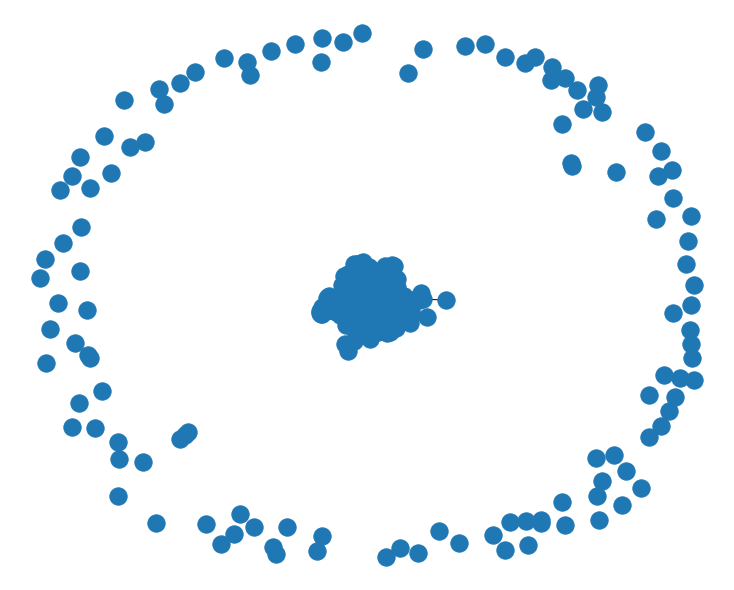

In [ ]:
nx.draw(G)

#Getting use attributes
In this case, the tenure as either old or new

In [3]:
cd /content/gdrive/MyDrive/Foster care/Ex_Foster Paper/

/content/gdrive/MyDrive/Foster care/Ex_Foster Paper


In [4]:
!ls

Ex_Foster_Complete.json     Ex_Foster_Top2Vec_Comment_Level.ipynb
Ex_Foster_edgelistFile.csv  Ex_Foster_Top2Vec.ipynb
Ex_Foster_Explore.ipynb     Ex_Foster_Top2Vec_Thread_all.model
Ex_Foster_Gephi.gexf	    Ex_Foster_Users.json
Ex_Foster_Net.gml	    NetworkTest.ipynb
Ex_Foster_Network.ipynb


In [5]:
G = nx.read_gml('Ex_Foster_Net.gml')

In [7]:
#Adding edge attributes
user_attributes = pd.read_json('Ex_Foster_Users.json')
user_attributes = user_attributes[['tenure_label']]
user_attributes.reset_index(inplace=True)
user_attributes.columns = ['author','tenure_label']
display(user_attributes.head())
author_list = user_attributes.author.tolist()
tenure_list = user_attributes.tenure_label.tolist()
attr = {author_list[i]: tenure_list[i] for i in range(len(author_list))} 

,author,tenure_label
0,-Wyfe-,1
1,-shrug-,0
2,101924601,1
3,1BeARCT,1
4,3pi1415,1


In [8]:
#Creating the new attribute
nx.set_node_attributes(G,attr,'tenure')

In [9]:
#checking the node attributes
users = list(G.nodes)
G.nodes[users[0]]

{'tenure': 1}

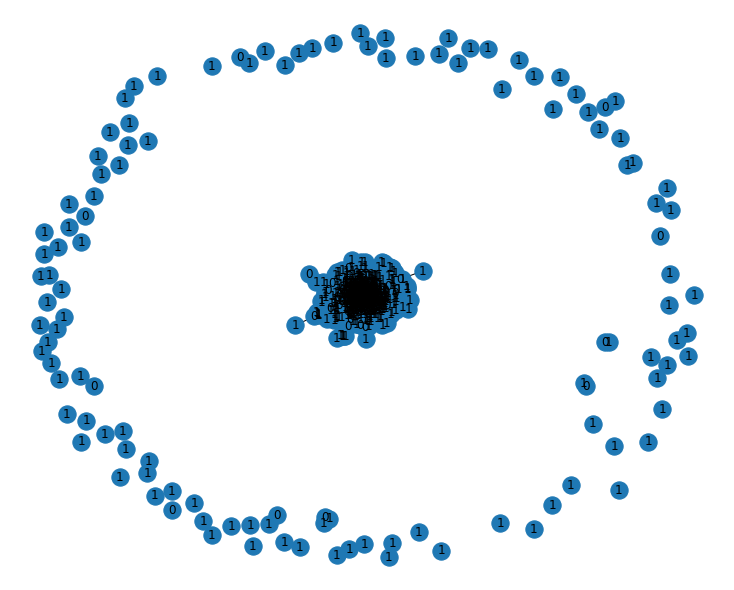

In [19]:
labels = nx.get_node_attributes(G, 'tenure') 
nx.draw(G,labels=labels)

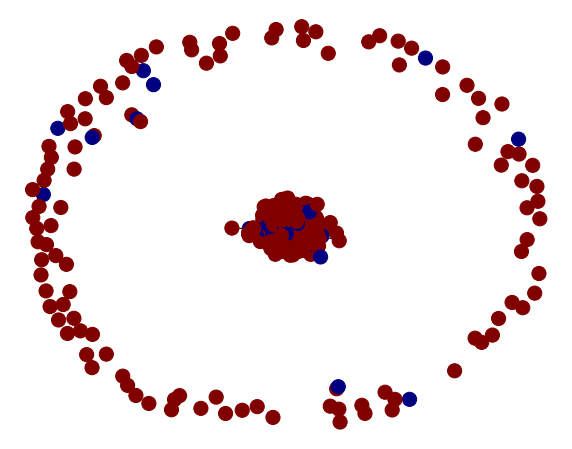

In [25]:
import matplotlib.pyplot as plt
# create number for each group to allow use of colormap
from itertools import count
# get unique groups
tenure = set(nx.get_node_attributes(G,'tenure').values())
mapping = dict(zip(sorted(tenure),count()))
nodes = G.nodes()
colors = [mapping[G.nodes[n]['tenure']] for n in nodes]

# drawing nodes and edges separately so we can capture collection for colobar
pos = nx.spring_layout(G)
ec = nx.draw_networkx_edges(G, pos, alpha=1.0)
nc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_size=200, node_color=colors, label=labels, cmap=plt.cm.jet)
plt.axis('off')
plt.show()

In [14]:
from networkx.drawing.nx_agraph import graphviz_layout

In [10]:
G = nx.read_gml("/content/gdrive/MyDrive/Foster care/Ex_Foster Paper/Ex_Foster_Net.gml")

In [17]:
!sudo apt-get install graphviz graphviz-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.40.1-2).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 17 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail18 amd64 2

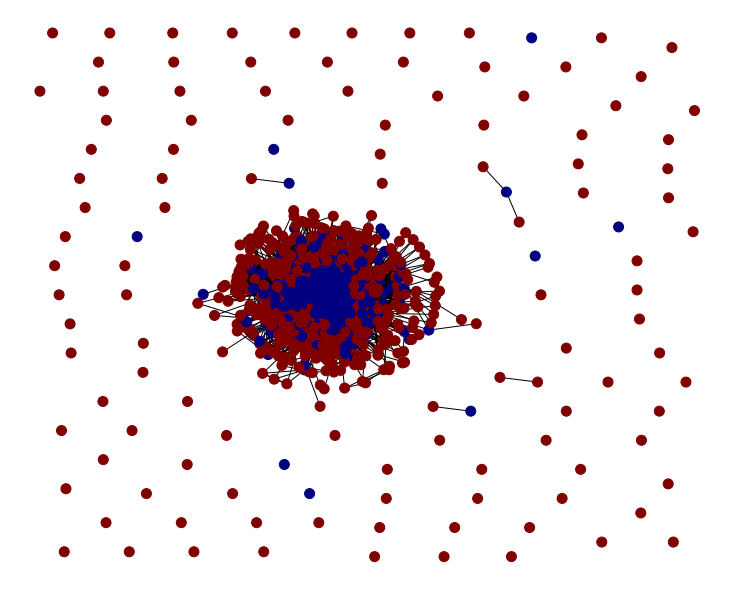

In [27]:
from itertools import count
# get unique groups
tenure = set(nx.get_node_attributes(G,'tenure').values())
mapping = dict(zip(sorted(tenure),count()))
nodes = G.nodes()
colors = [mapping[G.nodes[n]['tenure']] for n in nodes]

# drawing nodes and edges separately so we can capture collection for colobar
#pos = graphviz_layout(G)
nx.draw(G, pos=graphviz_layout(G), nodelist=nodes, node_size=100, node_color=colors, cmap=plt.cm.jet)
plt.axis('off')
plt.show()